In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
#Clean data

# 2019 broadband data file
broad_2019 = pd.read_csv("input/broadband_data_2019November.csv")
# Clean the data set by dropping rows with missing values
broad_2019[' BROADBAND USAGE '] = pd.to_numeric(broad_2019[' BROADBAND USAGE '], errors='coerce')
broad_2019[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2019[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
nan_value = float("NaN")
broad_2019.replace("-", nan_value, inplace = True)
broad_2019.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2019.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
#broad_2019 = broad_2019.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])

# 2020 broadband data file
broad_2020 = pd.read_csv("input/broadband_data_2020October.csv")
# Clean the data by dropping rows with missing values
broad_2020[' BROADBAND USAGE '] = pd.to_numeric(broad_2020[' BROADBAND USAGE '], errors='coerce')
broad_2020[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2020[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
broad_2020.replace("-", nan_value, inplace = True)
broad_2020.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2020.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
#broad_2020 = broad_2020.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])

# broadband challenge file
#broad_challenge = pd.read_csv("./input/broadband_data_opendatachallenge.csv")

# broadband by zip code
broad_zip = pd.read_csv("input/broadband_data_zipcode.csv")

([<matplotlib.axis.XTick at 0x25abe6a60a0>,
 [Text(1, 0, '2019'), Text(2, 0, '2020')])

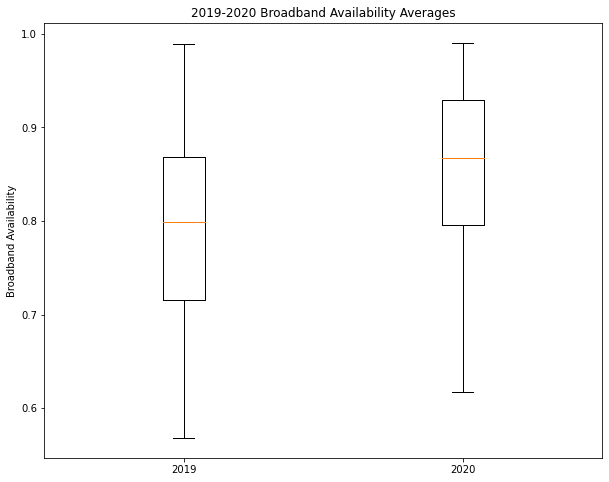

In [5]:
#Plot boxplots of Broadband Availability Averages for 2019 and 2020

plt.rcParams['figure.figsize'] = [10, 8]
plt.ylabel('Broadband Availability')
plt.title('2019-2020 Broadband Availability Averages')

states = broad_2019['ST'].unique()
availMeans2019 = []
for s in states :
    uniqueState = broad_2019.loc[broad_2019['ST'] == s]
    availMeans2019.append(uniqueState[' BROADBAND AVAILABILITY PER FCC '].mean())
    
states = broad_2020['ST'].unique()
availMeans2020 = []
for s in states :
    uniqueState = broad_2020.loc[broad_2020['ST'] == s]
    availMeans2020.append(uniqueState[' BROADBAND AVAILABILITY PER FCC '].mean())
    
plt.boxplot([availMeans2019, availMeans2020])
plt.xticks([1, 2], ['2019', '2020'])

([<matplotlib.axis.XTick at 0x25abe349430>,
 [Text(1.0, 0, 'AL'),
  Text(2.0, 0, 'AK'),
  Text(3.0, 0, 'AZ'),
  Text(4.0, 0, 'AR'),
  Text(5.0, 0, 'CA'),
  Text(6.0, 0, 'CO'),
  Text(7.0, 0, 'CT'),
  Text(8.0, 0, 'DE'),
  Text(9.0, 0, 'DC'),
  Text(10.0, 0, 'FL'),
  Text(11.0, 0, 'GA'),
  Text(12.0, 0, 'HI'),
  Text(13.0, 0, 'ID'),
  Text(14.0, 0, 'IL'),
  Text(15.0, 0, 'IN'),
  Text(16.0, 0, 'IA'),
  Text(17.0, 0, 'KS'),
  Text(18.0, 0, 'KY'),
  Text(19.0, 0, 'LA'),
  Text(20.0, 0, 'ME'),
  Text(21.0, 0, 'MD'),
  Text(22.0, 0, 'MA'),
  Text(23.0, 0, 'MI'),
  Text(24.0, 0, 'MN'),
  Text(25.0, 0, 'MS'),
  Text(26.0, 0, 'MO'),
  Text(27.0, 0, 'MT'),
  Text(28.0, 0, 'NE'),
  Text(29.0, 0, 'NV'),
  Text(30.0, 0, 'NH'),
  Text(31.0, 0, 'NJ'),
  Text(32.0, 0, 'NM'),
  Text(33.0, 0, 'NY'),
  Text(34.0, 0, 'NC'),
  Text(35.0, 0, 'ND'),
  Text(36.0, 0, 'OH'),
  Text(37.0, 0, 'OK'),
  Text(38.0, 0, 'OR'),
  Text(39.0, 0, 'PA'),
  Text(40.0, 0, 'RI'),
  Text(41.0, 0, 'SC'),
  Text(42.0, 0, 'SD'),

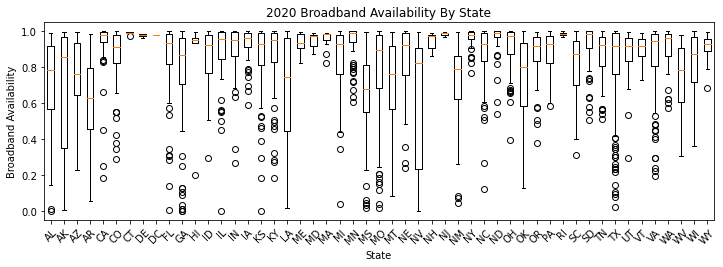

In [6]:
#

plt.rcParams['figure.figsize'] = [12, 8]

states = broad_2020['ST'].unique()
stateAvails = []
stateAvailMeans = []

for s in states :
    stateAvails.append(broad_2020[' BROADBAND AVAILABILITY PER FCC '].loc[(broad_2020['ST'] == s)])
    stateAvailMeans.append(stateAvails[-1].mean())
    
plt.subplot(2,1,1)
plt.xlabel('State')
plt.ylabel('Broadband Availability')
plt.title('2020 Broadband Availability By State')
plt.boxplot(stateAvails)
x = np.linspace(1,51, 51)
plt.xticks(x, states, rotation=45)

<BarContainer object of 51 artists>

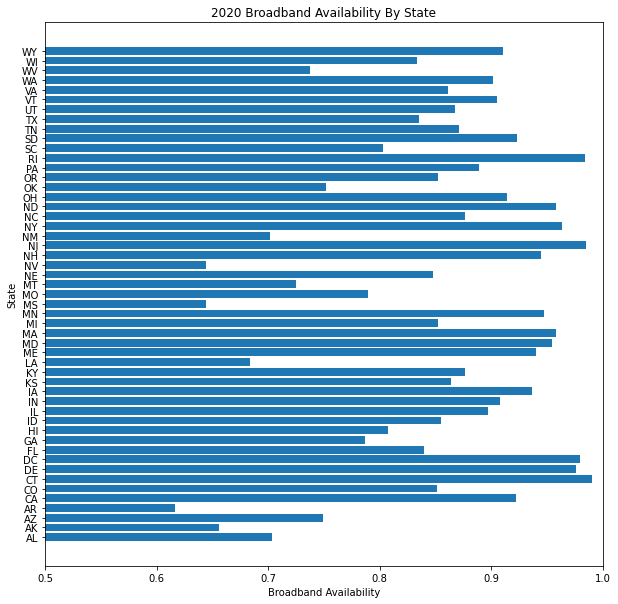

In [9]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlabel('Broadband Availability')
plt.ylabel('State')
plt.title('2020 Broadband Availability Mean By State')
plt.xlim(.5,1)
plt.barh(states,stateAvailMeans) #make nice, ya know
